In [1]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import logomaker as lm

import RNA

sys.path.append('../')
sys.path.append('../linearbpdesign/')
sys.path.append('../script/')
from linearbpdesign.sampler import Sampler as LinearSampler
from linearbpdesign.designBP import ssrandom, isSeparable, ssparse, dbn_to_tree
from script.structure_info import deg_of_ss, min_helix_length_of_ss

This notebook generates the resulting figures from uniforly sampled structures

# Loading data

In [172]:
res = []
for seed in ['linearbp', 'linearbp_onlyA', 'uniform', 'bpenergy', 'bpenergy_halfC']:
    df = pd.read_pickle(f'../results/design_unique_mfe_150_hard_results/{seed}_summary.pkl')
    df.loc[:, 'method'] = seed
    res.append(df)
res.append(df)
dfAll = pd.concat(res, ignore_index=True)
dfAll

,ss,seq,mutation,hamming,rounds,CG paired,GC unpaired,energy,prob,ensemble,avg Hamming,Paired Entropy,Paired Entropy Di,Unpaired Entropy,Unpaired Entropy Di,method
0,...........(.(((((...((.((.....(((..((((.........,AAAAAAAAAAACAGCGGACCCUUCUUCCCCCAGGAAGCGACCCCCC...,before,NaN,NaN,0.562500,0.383721,-14.700000,1.435470e-07,0.157923,89.32,1.977997,3.217073,0.988965,1.187935,linearbp
1,...........(.(((((...((.((.....(((..((((.........,AAAAAAAAAAAGAGCGGACCCUCCUCCCCCCCAGAAGCGACCCCCC...,after,11.0,2.0,0.625000,0.395349,-20.600000,6.408946e-02,0.064676,87.36,1.887830,3.297460,1.000562,1.291667,linearbp
2,...........(.(((((...((.((.....(((..((((.........,AAAAAAAAAAACACCGCCAAACUCAUCCCCCAAACCUCGACCCCCC...,before,NaN,NaN,0.531250,0.348837,-13.700000,4.717480e-06,0.142789,89.06,1.977997,3.217073,0.988965,1.187935,linearbp
3,...........(.(((((...((.((.....(((..((((.........,AAAAAAAAAAACACCGCCAAACGCAGCCCCCAGACCUCGACCCCCC...,after,11.0,1.0,0.656250,0.360465,-22.799999,6.101424e-02,0.104634,87.60,1.887830,3.297460,1.000562,1.291667,linearbp
4,...........(.(((((...((.((.....(((..((((.........,CCCCCCCCCCCUCAUUGACCCUUCAACCCCCUGACCAAUUCCCCCC...,before,NaN,NaN,0.250000,1.000000,1.800000,1.457786e-09,0.263515,96.62,1.977997,3.217073,0.988965,1.187935,linearbp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567795,((((.(((((((((((.((((((..(((.(....).))).....))...,GGCAAGGCGGUGGGUGAGGCCCGAACUCACAAAAGCGGGAAAAAUG...,after,5.0,2.0,0.833333,0.300000,-60.299999,2.097573e-01,0.037906,86.31,1.576440,3.000200,1.094820,1.655077,bpenergy_halfC
567796,((((.(((((((((((.((((((..(((.(....).))).....))...,CGGGCGCUUCCCCCGGACCGUGCAACGGCGAAAAUCCCGAAAAAGC...,before,NaN,NaN,0.822222,0.550000,-52.700001,5.930990e-12,0.351170,83.93,1.515497,2.858427,0.992769,1.457746,bpenergy_halfC
567797,((((.(((((((((((.((((((..(((.(....).))).....))...,CGGGCACUUCCCCCGGACCGUGCAACGGCCAAAAGCCCGAAAAAGC...,after,13.0,1.0,0.800000,0.466667,-55.799999,4.439258e-03,0.232410,87.04,1.576440,3.000200,1.094820,1.655077,bpenergy_halfC
567798,((((.(((((((((((.((((((..(((.(....).))).....))...,GGCGCGCCCCGGCACCCCCGCGGCCCCCACAAAAGAGGGCCCCCCC...,before,NaN,NaN,0.888889,0.750000,-65.099998,1.036920e-08,0.504062,83.15,1.515497,2.858427,0.992769,1.457746,bpenergy_halfC


In [173]:
dfAll.columns

Index(['ss', 'seq', 'mutation', 'hamming', 'rounds', 'CG paired',
       'GC unpaired', 'energy', 'prob', 'ensemble', 'avg Hamming',
       'Paired Entropy', 'Paired Entropy Di', 'Unpaired Entropy',
       'Unpaired Entropy Di', 'method'],
      dtype='object')

In [174]:
# Get average performance
dfAvgSummary = dfAll.groupby(['ss', 'method', 'mutation'],
                             as_index=False, sort=False).agg({x: 'mean' for x in ['hamming', 'CG paired',
       'GC unpaired', 'energy', 'prob', 'ensemble', 'avg Hamming', 'Paired Entropy',
       'Paired Entropy Di', 'Unpaired Entropy', 'Unpaired Entropy Di']})
dfAvgSummary

,ss,method,mutation,hamming,CG paired,GC unpaired,energy,prob,ensemble,avg Hamming,Paired Entropy,Paired Entropy Di,Unpaired Entropy,Unpaired Entropy Di
0,...........(.(((((...((.((.....(((..((((.........,linearbp,before,NaN,0.547500,0.441395,-15.167,0.015086,0.197742,89.8596,1.977997,3.217073,0.988965,1.187935
1,...........(.(((((...((.((.....(((..((((.........,linearbp,after,9.80,0.631719,0.441047,-21.198,0.090296,0.112595,87.7622,1.887830,3.297460,1.000562,1.291667
2,..........((((...((..((((((.((.((.(.(....).).....,linearbp,before,NaN,0.677500,0.203333,-30.805,0.001311,0.109648,69.6256,1.729959,2.910619,0.636470,0.827335
3,..........((((...((..((((((.((.((.(.(....).).....,linearbp,after,9.71,0.696250,0.247308,-37.622,0.106544,0.091560,71.7518,1.733620,3.012085,0.702621,0.979267
4,..............(((((((((..((((..(..(((........)...,linearbp,before,NaN,0.703158,0.117838,-47.607,0.077881,0.033702,66.5556,1.757998,3.094617,0.507236,0.709150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,..(((((..(.......(((..........))).......)..)))...,bpenergy_halfC,after,7.63,0.852000,0.446571,-54.891,0.157848,0.092357,83.8706,1.550551,2.950971,1.062783,1.521459
4728,.((((...((.(((...(((((.((.(((.(.....((.((((......,bpenergy_halfC,before,NaN,0.860556,0.481500,-50.514,0.000664,0.349437,84.3026,1.528593,2.841982,0.991043,1.659975
4729,.((((...((.(((...(((((.((.(((.(.....((.((((......,bpenergy_halfC,after,11.79,0.843111,0.462000,-52.700,0.058020,0.174466,86.4126,1.571592,2.960479,1.104012,1.850675
4730,((((.(((((((((((.((((((..(((.(....).))).....))...,bpenergy_halfC,before,NaN,0.866222,0.490500,-61.337,0.002183,0.262117,84.2070,1.515497,2.858427,0.992769,1.457746


In [180]:
dfAll.groupby(['method', 'mutation'], as_index=False, sort=False).agg({'ensemble': ['mean'], 'hamming': ['mean'], 'Paired Entropy': ['mean']}) 

,method,mutation,ensemble,hamming,Paired Entropy
,,,mean,mean,mean
0,linearbp,before,0.137621,NaN,1.876146
1,linearbp,after,0.077491,6.195085,1.821607
2,linearbp_onlyA,before,0.030771,NaN,1.048998
3,linearbp_onlyA,after,0.020781,2.213694,1.049165
4,uniform,before,0.307320,NaN,1.894974
5,uniform,after,0.138505,15.484118,1.851697
6,bpenergy,before,0.082327,NaN,1.508459
7,bpenergy,after,0.040448,5.436996,1.475724
8,bpenergy_halfC,before,0.297529,NaN,1.509181


In [6]:
dfAvgSummary.value_counts(['method', 'mutation'])

method          mutation
bpenergy        after       476
                before      476
uniform         after       476
                before      476
bpenergy_halfC  after       473
                before      473
linearbp_onlyA  after       471
                before      471
linearbp        after       470
                before      470
Name: count, dtype: int64

# Plots

In [125]:
order = ['linearbp_onlyA', 'linearbp', 'bpenergy', 'bpenergy_halfC', 'uniform']
xticks = ['A-separable', 'Bi-separable', 'Boltzmann', 'Boltzmann 50%C', 'Uniform']

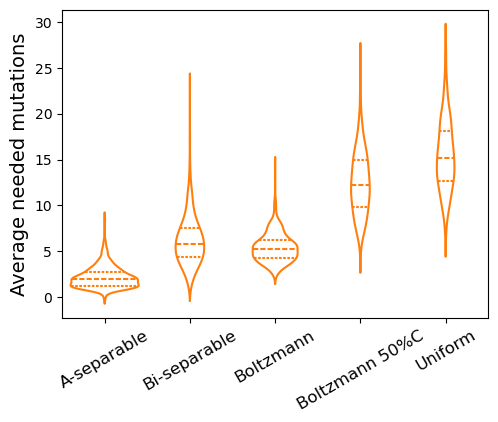

In [120]:
plt.subplots(figsize=(5.5,4))
g=sns.violinplot(data=dfAvgSummary[dfAvgSummary['mutation']=='after'], x='method', y='hamming',fill=False, inner="quart", order=order, color=sns.color_palette()[1])
plt.xticks(range(len(xticks)), xticks, rotation=30, fontsize=12)
plt.xlabel('')
plt.ylabel('Average needed mutations', fontsize=14)
plt.savefig('../img/violin_mutation_avg.pdf', dpi=200, bbox_inches='tight')

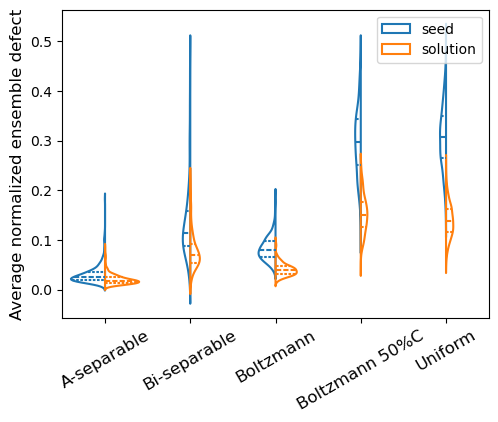

In [126]:
plt.subplots(figsize=(5.5,4))
g=sns.violinplot(data=dfAvgSummary, x='method', y='ensemble', hue='mutation', split=True, hue_order=['before', 'after'],fill=False, inner="quart", order=order)
t=g.get_legend()
t.set_title("")
new_labels = ['seed', 'solution']
for t, l in zip(t.texts, new_labels):
    t.set_text(l)

plt.xticks(range(len(xticks)), xticks, rotation=30, fontsize=12)
plt.xlabel('')
plt.ylabel('Average normalized ensemble defect', fontsize=12)
plt.savefig('../img/violin_ensemble_avg.pdf', dpi=200, bbox_inches='tight')

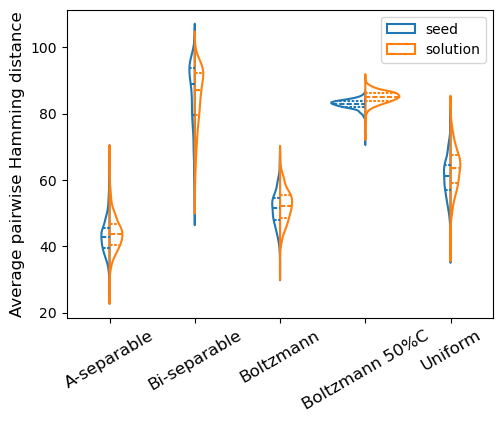

In [54]:
plt.subplots(figsize=(5.5,4))

g=sns.violinplot(data=dfAvgSummary, x='method', y='avg Hamming', hue='mutation', split=True, hue_order=['before', 'after'], fill=False, inner="quart", order=order)
t=g.get_legend()
t.set_title("")
new_labels = ['seed', 'solution']
for t, l in zip(t.texts, new_labels):
    t.set_text(l)

plt.xticks(range(len(xticks)), xticks, rotation=30, fontsize=12)
plt.xlabel('')
plt.ylabel('Average pairwise Hamming distance', fontsize=12)
plt.savefig('../img/violin_diversity_avg.pdf', dpi=200, bbox_inches='tight')

Time distribution

In [60]:
dfTime = pd.read_csv('../results/design_unique_mfe_150_hard_results/time_summary.csv', sep='\t')
dfTime.loc[:, 'time_min'] = dfTime['time']/60
dfTime

,puzzle,time,space,method,time_min
0,17,303.79,168.964,uniform,5.063167
1,12,91.35,168.228,uniform,1.522500
2,13,55.47,168.540,uniform,0.924500
3,15,93.02,168.088,uniform,1.550333
4,21,156.02,168.692,uniform,2.600333
...,...,...,...,...,...
2361,473,14.30,199.968,linearbp_onlyA,0.238333
2362,474,9.94,200.936,linearbp_onlyA,0.165667
2363,472,9.54,200.516,linearbp_onlyA,0.159000
2364,475,56.87,199.768,linearbp_onlyA,0.947833


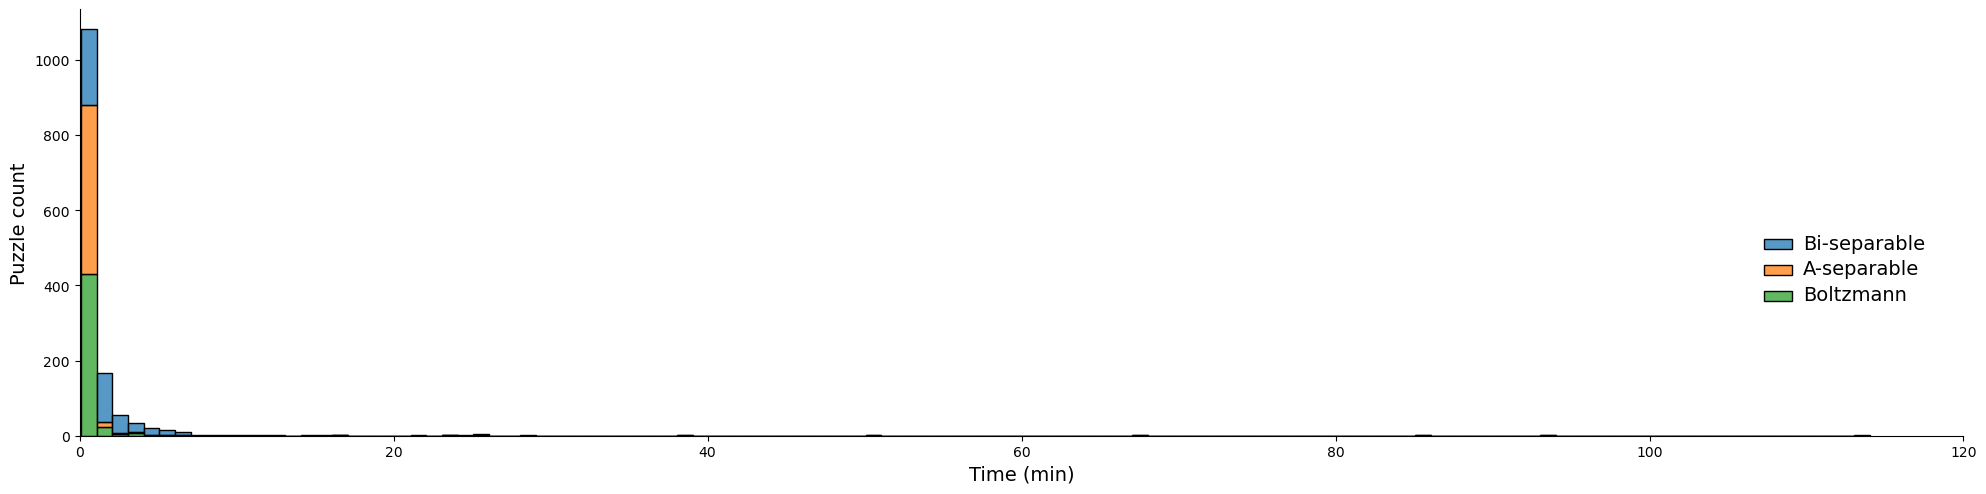

In [159]:
methods = ['linearbp', 'linearbp_onlyA', 'bpenergy']
g = sns.displot(data=dfTime[dfTime['method'].isin(methods)], x='time_min', hue='method', hue_order=methods, 
                binwidth=1, aspect=4, multiple="stack")
t = g._legend
t.set_title("")
new_labels = ['Bi-separable', 'A-separable', 'Boltzmann']
for t, l in zip(t.texts, new_labels):
    t.set_text(l)
plt.xlim(0, 120)
sns.move_legend(g, "right", bbox_to_anchor=(.9, .45))
plt.setp(g._legend.get_texts(), fontsize='14') # for legend text
plt.xlabel('Time (min)', fontsize=14)
plt.ylabel('Puzzle count', fontsize=14)
plt.savefig('../img/mfe_150_time.pdf', dpi=200, bbox_inches='tight')

# Post design walk in neutral network

In [5]:
target = '((((...(((((((.(((........)))))))((((((..((((.(((...............))).))))..))))))...............))).))))..(.(((((((((((..((......))..)))...)))))))).)..'
designs = dfAll.loc[(dfAll['method']=='linearbp')&(dfAll['ss']==target)&(dfAll['mutation']=='after'), 'seq'].to_list()

In [6]:
mutations = {x: [y for y in 'ACGU' if y!=x] for x in 'ACGU'}
mutations

{'A': ['C', 'G', 'U'],
 'C': ['A', 'G', 'U'],
 'G': ['A', 'C', 'U'],
 'U': ['A', 'C', 'G']}

In [41]:
def randomWalk(target, seq, nb):
    """Random walk in neutral network with only allow mutaion in unpaired position
    """
    unpaired = [i for i, x in enumerate(target) if x == '.']
    cur_seq = seq
  
    for _ in range(nb):
        pos = random.choice(unpaired)
        m = random.choice(mutations[cur_seq[pos]])
        new_seq = cur_seq[:pos] + m + cur_seq[pos+1:]
        mfe, _ = RNA.fold(new_seq)
        if mfe == target:
            cur_seq = new_seq
    return cur_seq

def randomWalk_ensemble(target, seq, nb, tolerance=0.01):
    """Random walk in neutral network with only allow mutaion in unpaired position and force improving ensemble defect
    """
    unpaired = [i for i, x in enumerate(target) if x == '.']
    cur_seq = seq
    cur_ens = ensemble(target, cur_seq)
        
    for _ in range(nb):
        stop = True
        for pos in np.random.permutation(unpaired):
            m = random.choice(mutations[cur_seq[pos]])
            new_seq = cur_seq[:pos] + m + cur_seq[pos+1:]
            mfe, _ = RNA.fold(new_seq)
            if mfe == target:
                new_ens = ensemble(target, new_seq)
                if new_ens <= cur_ens + tolerance:
                    cur_ens = new_ens
                    cur_seq = new_seq
                    stop = False
        if stop:
            break
    return cur_seq

In [8]:
def compute_entropy(labels):
    """Positional Shannon entropy for given information
    """
    n_labels = len(labels)
    values, counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)
    if n_classes <= 1:
        return 0
    ent = 0.
    for i in probs:
        ent -= i * np.log2(i)
    return ent

def unpaired_entropy(ss, sequences):
    """Compute unpaired entropy with mono or di nucleotides
    """
    unpaired_entropy = []
    unpaired_entropy_di = []
    for ind, c in enumerate(ss):
        labels = [x[ind] for x in sequences]
        ent = compute_entropy(labels)
        if c == '.':
            unpaired_entropy.append(ent)
        if ind == len(ss) - 1:
            continue
        di_labels = [x[ind]+x[ind+1] for x in sequences]
        di_ent = compute_entropy(di_labels)
        if c == '.':
            unpaired_entropy_di.append(di_ent)
    return np.mean(unpaired_entropy), np.mean(unpaired_entropy_di)

In [9]:
def ensemble(ss, w):
    fc = RNA.fold_compound(w)
    fc.pf()
    return fc.ensemble_defect(ss)

In [25]:
new_designs = [randomWalk(target, w, 100) for w in designs]

In [26]:
print(unpaired_entropy(target, designs))
print(unpaired_entropy(target, new_designs))

(1.0121457587047193, 1.3293895925796029)
(1.801947735237122, 3.5085568087485575)


In [27]:
ensemble_before = [ensemble(target, w) for w in designs]
ensemble_after = [ensemble(target, w) for w in new_designs]

In [28]:
np.mean(ensemble_before)

0.08486424037378827

In [29]:
np.mean(ensemble_after)

0.17521827146017122

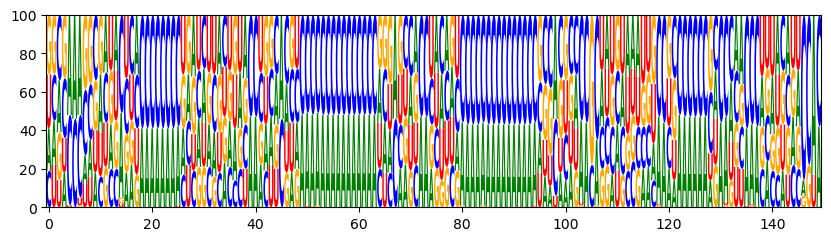

In [47]:
counts_mat_origin = lm.alignment_to_matrix(designs)
lm.Logo(counts_mat_origin)

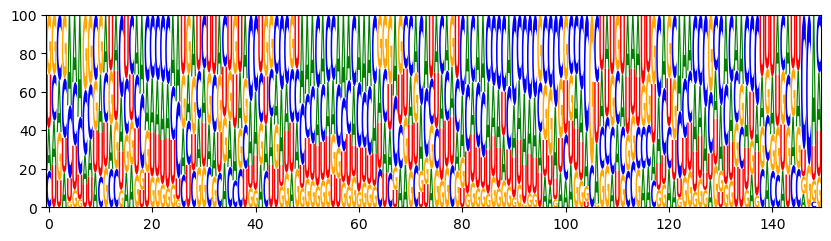

In [51]:
counts_mat_new = lm.alignment_to_matrix(new_designs)
lm.Logo(counts_mat_new)

In [42]:
# This will take long time to compute
new_designs_ens = [randomWalk_ensemble(target, w, 100) for w in designs]

In [43]:
ensemble_better = [ensemble(target, w) for w in new_designs_ens]
np.mean(ensemble_better)

0.08279219569943333

In [53]:
with open('results/case_study_420_ens_seq.txt', 'w') as f:
    for w in new_designs_ens:
        print(w, file=f)

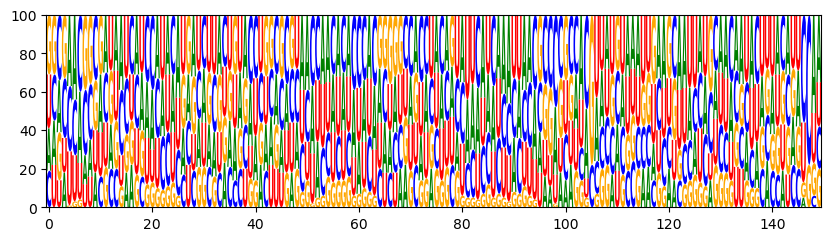

In [54]:
counts_mat_ens = lm.alignment_to_matrix(new_designs_ens)
lm.Logo(counts_mat_ens)

In [45]:
print(unpaired_entropy(target, new_designs_ens))

(1.840282646637293, 3.578998190054708)


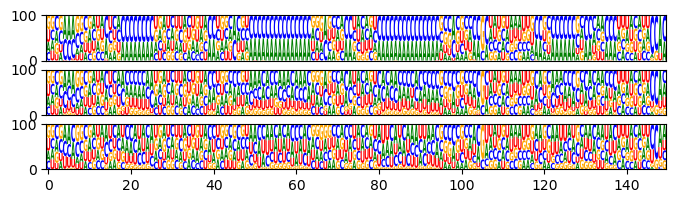

In [57]:
fig, axs = plt.subplots(nrows=3, figsize=(8,2))
ax1 = axs[0]
lm.Logo(counts_mat_origin, ax=ax1)
ax1.set_xticks([])
ax2 = axs[1]
lm.Logo(counts_mat_new, ax=ax2)
ax2.set_xticks([])
ax3 = axs[2]
lm.Logo(counts_mat_ens, ax=ax3)
plt.savefig('../img/case_study_420_logo.pdf', dpi=200, bbox_inches='tight')

## LeaRNA

In [94]:
dfLearnaStat = pd.read_csv('../results/design_unique_mfe_150_hard_results/stat_learna_resutls.csv', sep='\t')
print('# structures w/ 100 unique solutions: {}.'.format(sum(dfLearnaStat['unique']==100)))
print('# structures w/o any solution: {}. # structures w/o unique solution: {}'.format(476-len(dfLearnaStat), 476-sum(dfLearnaStat['unique']>0)))

# structures w/ 100 unique solutions: 350.
# structures w/o any solution: 13. # structures w/o unique solution: 21


In [86]:
# Get structure where libLeaRNA return more than 50 unique MFE
learna_over50 = dfLearnaStat.loc[dfLearnaStat['unique']>=50, 'i'].to_list()
learna_over50_ss = []
with open('../benchmark/unique_MFE_150_hard.txt') as f:
    for ind, line in enumerate(f.readlines()):
        if ind+1 in learna_over50:
            learna_over50_ss.append(line.strip())
print(len(learna_over50_ss))

378


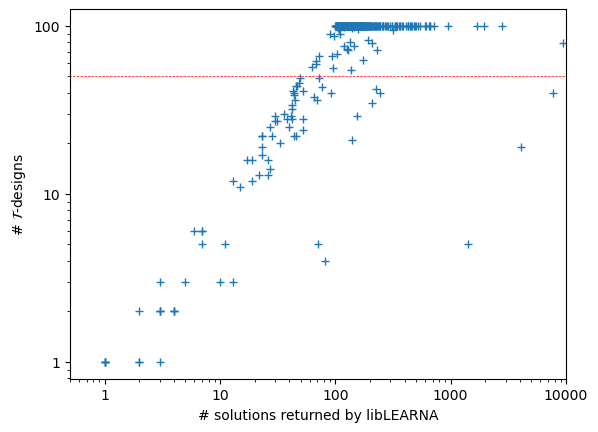

In [182]:
plt.plot(dfLearnaStat['total_seen'], dfLearnaStat['unique'], '+')
plt.hlines(50, 0, 10000, 'r', '--', lw=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.5, 10000)

plt.xticks([1, 10, 100, 1000, 10000], [1, 10, 100, 1000, 10000])
plt.yticks([1, 10, 100], [1, 10, 100])
plt.ylabel("# $\mathcal{T}$-designs")
plt.xlabel("# solutions returned by libLEARNA")
plt.savefig('../img/mfe_learna.pdf', dpi=200, bbox_inches='tight')

In [99]:
df = pd.read_pickle('../results/design_unique_mfe_150_hard_results/results_learna_hard150_summary.pkl')
df.loc[:, 'method'] = 'learna'
df.loc[:, 'hamming'] = np.NaN
df.loc[:, 'rounds'] = np.NaN
dfLearna = df.loc[df['ss'].isin(learna_over50_ss)]

In [103]:
dfAllExt = pd.concat([dfAll, dfLearna])

In [107]:
dfAllExt.groupby(['method', 'mutation'], as_index=False, sort=False).agg({'ensemble': 'mean', }) 

,method,mutation,ensemble
0,linearbp,before,0.137621
1,linearbp,after,0.077491
2,linearbp_onlyA,before,0.030771
3,linearbp_onlyA,after,0.020781
4,uniform,before,0.307320
5,uniform,after,0.138505
6,bpenergy,before,0.082327
7,bpenergy,after,0.040448
8,bpenergy_halfC,before,0.297529
9,bpenergy_halfC,after,0.151947


In [170]:
dfAllExt.groupby(['method', 'mutation'], as_index=False, sort=False).agg({'hamming': 'mean', }) 

,method,mutation,hamming
0,linearbp,before,NaN
1,linearbp,after,6.195085
2,linearbp_onlyA,before,NaN
3,linearbp_onlyA,after,2.213694
4,uniform,before,NaN
5,uniform,after,15.484118
6,bpenergy,before,NaN
7,bpenergy,after,5.436996
8,bpenergy_halfC,before,NaN
9,bpenergy_halfC,after,12.500465


In [104]:
# Get average performance
dfAvgSummaryExt = dfAllExt.groupby(['ss', 'method', 'mutation'],
                             as_index=False, sort=False).agg({x: 'mean' for x in ['hamming', 'CG paired',
       'GC unpaired', 'energy', 'prob', 'ensemble', 'avg Hamming', 'Paired Entropy',
       'Paired Entropy Di', 'Unpaired Entropy', 'Unpaired Entropy Di']})
dfAvgSummaryExt

,ss,method,mutation,hamming,CG paired,GC unpaired,energy,prob,ensemble,avg Hamming,Paired Entropy,Paired Entropy Di,Unpaired Entropy,Unpaired Entropy Di
0,...........(.(((((...((.((.....(((..((((.........,linearbp,before,NaN,0.547500,0.441395,-15.167,0.015086,0.197742,89.8596,1.977997,3.217073,0.988965,1.187935
1,...........(.(((((...((.((.....(((..((((.........,linearbp,after,9.80,0.631719,0.441047,-21.198,0.090296,0.112595,87.7622,1.887830,3.297460,1.000562,1.291667
2,..........((((...((..((((((.((.((.(.(....).).....,linearbp,before,NaN,0.677500,0.203333,-30.805,0.001311,0.109648,69.6256,1.729959,2.910619,0.636470,0.827335
3,..........((((...((..((((((.((.((.(.(....).).....,linearbp,after,9.71,0.696250,0.247308,-37.622,0.106544,0.091560,71.7518,1.733620,3.012085,0.702621,0.979267
4,..............(((((((((..((((..(..(((........)...,linearbp,before,NaN,0.703158,0.117838,-47.607,0.077881,0.033702,66.5556,1.757998,3.094617,0.507236,0.709150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,..(((..((((.....((((.....))))))))..)))..((((.....,learna,after,NaN,0.619524,0.721970,-44.614,0.096500,0.091606,84.4874,1.796311,3.389004,1.110713,2.296153
5106,.....((((..(((((((((.((((((...(((((..(((((.......,learna,after,NaN,0.425208,0.372407,-41.976,0.093126,0.068824,78.0094,1.283785,2.454443,1.175357,2.334241
5107,...((((((...(((.(((((...(((........)))...)))))...,learna,after,NaN,0.554556,0.653667,-45.085,0.098382,0.062009,90.8230,1.796257,3.453452,1.241886,2.479879
5108,((((.((.(((((.((((((........)).)))).)))))..(.(...,learna,after,NaN,0.692391,0.753793,-54.433,0.031231,0.096306,69.1832,1.354482,2.619718,1.010334,1.983382


In [151]:
order = ['linearbp_onlyA', 'linearbp', 'bpenergy', 'bpenergy_halfC', 'uniform', 'learna']
xticks = ['A-separable', 'Bi-separable', 'Boltzmann', 'Boltzmann 50%C', 'Uniform', 'libLEARNA']

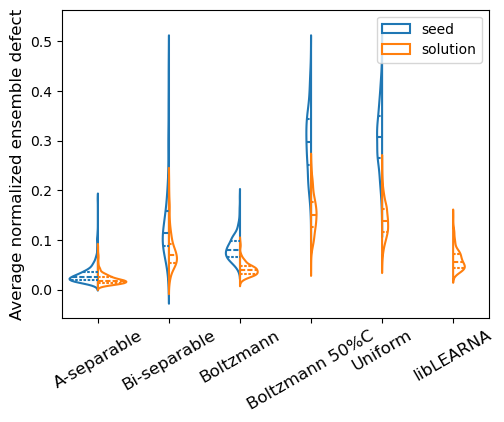

In [131]:
plt.subplots(figsize=(5.5,4))
g=sns.violinplot(data=dfAvgSummaryExt, x='method', y='ensemble', hue='mutation', split=True, hue_order=['before', 'after'],fill=False, inner="quart", order=order)
t=g.get_legend()
t.set_title("")
new_labels = ['seed', 'solution']
for t, l in zip(t.texts, new_labels):
    t.set_text(l)

plt.xticks(range(len(xticks)), xticks, rotation=30, fontsize=12)
plt.xlabel('')
plt.ylabel('Average normalized ensemble defect', fontsize=12)
plt.savefig('../img/violin_ensemble_avg_supp.pdf', dpi=200, bbox_inches='tight')

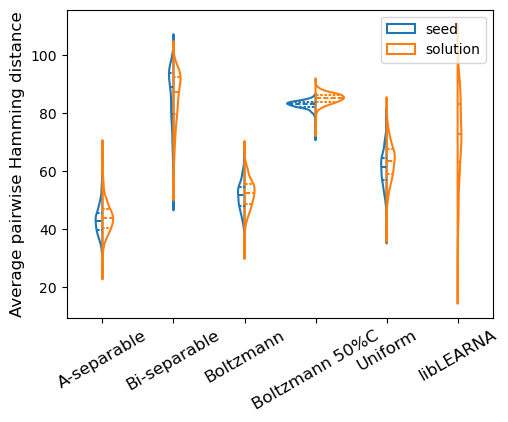

In [132]:
plt.subplots(figsize=(5.5,4))

g=sns.violinplot(data=dfAvgSummaryExt, x='method', y='avg Hamming', hue='mutation', split=True, hue_order=['before', 'after'], fill=False, inner="quart", order=order)
t=g.get_legend()
t.set_title("")
new_labels = ['seed', 'solution']
for t, l in zip(t.texts, new_labels):
    t.set_text(l)

plt.xticks(range(len(xticks)), xticks, rotation=30, fontsize=12)
plt.xlabel('')
plt.ylabel('Average pairwise Hamming distance', fontsize=12)
plt.savefig('../img/violin_diversity_avg_supp.pdf', dpi=200, bbox_inches='tight')

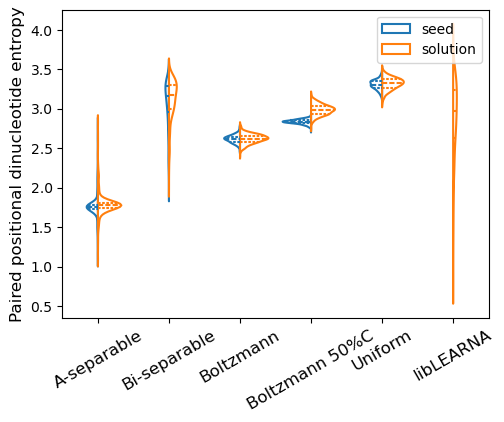

In [133]:
plt.subplots(figsize=(5.5,4))

g=sns.violinplot(data=dfAvgSummaryExt, x='method', y='Paired Entropy Di', hue='mutation', split=True, hue_order=['before', 'after'], fill=False, inner="quart", order=order)
t=g.get_legend()
t.set_title("")
new_labels = ['seed', 'solution']
for t, l in zip(t.texts, new_labels):
    t.set_text(l)

plt.xticks(range(len(xticks)), xticks, rotation=30, fontsize=12)
plt.xlabel('')
plt.ylabel('Paired positional dinucleotide entropy', fontsize=12)
plt.savefig('../img/violin_paired_supp.pdf', dpi=200, bbox_inches='tight')

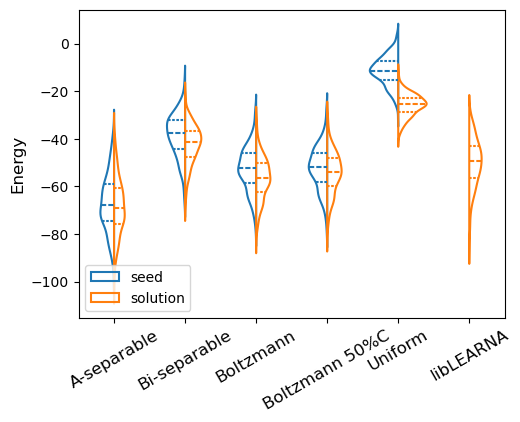

In [153]:
plt.subplots(figsize=(5.5,4))

g=sns.violinplot(data=dfAvgSummaryExt, x='method', y='energy', hue='mutation', split=True, hue_order=['before', 'after'], fill=False, inner="quart", order=order)
t=g.get_legend()
t.set_title("")
new_labels = ['seed', 'solution']
for t, l in zip(t.texts, new_labels):
    t.set_text(l)

plt.xticks(range(len(xticks)), xticks, rotation=30, fontsize=12)
plt.xlabel('')
plt.ylabel('Energy', fontsize=12)
plt.savefig('../img/violin_energy_supp.png', dpi=200, bbox_inches='tight')

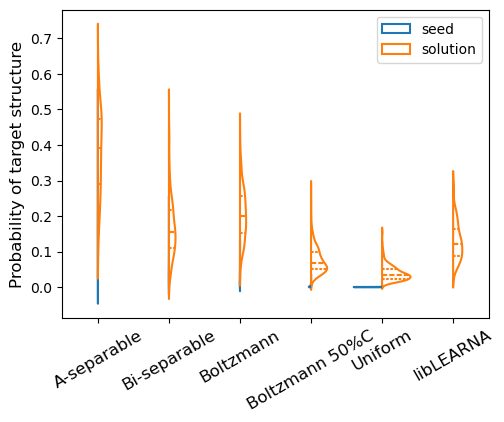

In [155]:
plt.subplots(figsize=(5.5,4))

g=sns.violinplot(data=dfAvgSummaryExt, x='method', y='prob', hue='mutation', split=True, hue_order=['before', 'after'], fill=False, inner="quart", order=order)
t=g.get_legend()
t.set_title("")
new_labels = ['seed', 'solution']
for t, l in zip(t.texts, new_labels):
    t.set_text(l)

plt.xticks(range(len(xticks)), xticks, rotation=30, fontsize=12)
plt.xlabel('')
plt.ylabel('Probability of target structure', fontsize=12)
plt.savefig('../img/violin_prob_supp.png', dpi=200, bbox_inches='tight')

In [111]:
dfBestSummaryExt = dfAllExt.groupby(['ss', 'method', 'mutation'],
                             as_index=False, sort=False).agg({'energy': 'min', 'prob': 'max', 'ensemble': 'min'})
dfBestSummaryExt

,ss,method,mutation,energy,prob,ensemble
0,...........(.(((((...((.((.....(((..((((.........,linearbp,before,-44.299999,0.208065,0.016533
1,...........(.(((((...((.((.....(((..((((.........,linearbp,after,-45.000000,0.485606,0.012337
2,..........((((...((..((((((.((.((.(.(....).).....,linearbp,before,-56.500000,0.010114,0.034027
3,..........((((...((..((((((.((.((.(.(....).).....,linearbp,after,-60.400002,0.421261,0.013303
4,..............(((((((((..((((..(..(((........)...,linearbp,before,-62.099998,0.167781,0.012814
...,...,...,...,...,...,...
5105,..(((..((((.....((((.....))))))))..)))..((((.....,learna,after,-56.400002,0.441777,0.025230
5106,.....((((..(((((((((.((((((...(((((..(((((.......,learna,after,-62.400002,0.359691,0.018708
5107,...((((((...(((.(((((...(((........)))...)))))...,learna,after,-61.200001,0.293070,0.020261
5108,((((.((.(((((.((((((........)).)))).)))))..(.(...,learna,after,-72.800003,0.111866,0.040573


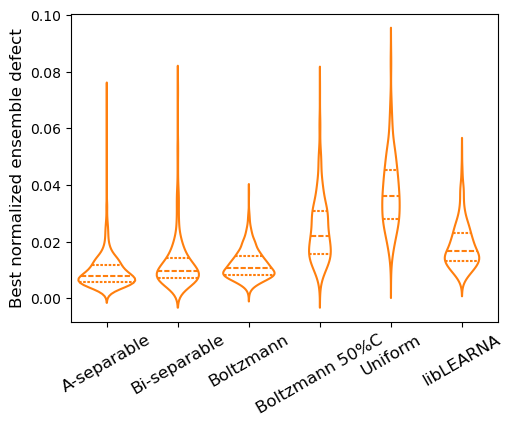

In [134]:
plt.subplots(figsize=(5.5,4))

g=sns.violinplot(data=dfBestSummaryExt[dfBestSummaryExt['mutation']=='after'], x='method', y='ensemble', fill=False, inner="quart", order=order, color=sns.color_palette()[1])


plt.xticks(range(len(xticks)), xticks, rotation=30, fontsize=12)
plt.xlabel('')
plt.ylabel('Best normalized ensemble defect', fontsize=12)
plt.savefig('../img/violin_ensemble_best_supp.pdf', dpi=200, bbox_inches='tight')

# Structures of 500nts

In [160]:
res = []
for seed in ['linearbp', 'linearbp_onlyA', 'bpenergy']:
    df = pd.read_pickle(f'../results/design_unique_mfe_500_results/{seed}_summary.pkl')
    df.loc[:, 'method'] = seed
    res.append(df)
dfAll500 = pd.concat(res, ignore_index=True)
dfAll500

,ss,seq,mutation,hamming,rounds,CG paired,GC unpaired,energy,prob,ensemble,avg Hamming,Paired Entropy,Paired Entropy Di,Unpaired Entropy,Unpaired Entropy Di,method
0,..(((((...(((.(((((...(((((......))))).))))).)...,AAGGACCAAACUCAGAAUCAAAGUUGGAAAAAACCAACAGAUUCAG...,before,NaN,NaN,0.680851,0.000000,-154.600006,3.467397e-03,0.034571,221.21,1.787814,3.086930,0.582733,0.840226,linearbp
1,..(((((...(((.(((((...(((((......))))).))))).)...,AAGGACCAAACUCAGAAUCAAAGUUGGAAAAAACCAACAGAUUCAG...,after,4.0,1.0,0.687943,0.000000,-157.399994,1.509198e-01,0.016087,218.68,1.754832,3.077641,0.587366,0.870298,linearbp
2,..(((((...(((.(((((...(((((......))))).))))).)...,AACCAACAAAGUCAGUUUGAAACCGUCAAAAAAGACGGACAAACAG...,before,NaN,NaN,0.808511,0.000000,-194.899994,4.565574e-03,0.031085,218.59,1.787814,3.086930,0.582733,0.840226,linearbp
3,..(((((...(((.(((((...(((((......))))).))))).)...,AACCAACAAAGUCAGUUUGAAACCGUCAAAAAAGACGGACAAACAG...,after,4.0,5.0,0.801418,0.000000,-192.699997,1.417666e-01,0.014751,216.04,1.754832,3.077641,0.587366,0.870298,linearbp
4,..(((((...(((.(((((...(((((......))))).))))).)...,CCUUUAUCCCAAGACAUUUCCCUCGGGAAAAAACCCGACAAAUGAC...,before,NaN,NaN,0.631206,0.261468,-143.899994,5.467896e-08,0.128060,267.45,1.787814,3.086930,0.582733,0.840226,linearbp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297995,(((.(((((....))))))))......(((((.((((...((((((...,CCCACGCCCAAAAGGGCGGGGAAAAAAAGCCUAGGUGAAAGCGCGG...,after,9.0,1.0,0.880000,0.000000,-235.800003,2.732595e-02,0.030803,180.50,1.519903,2.739243,0.038746,0.423016,bpenergy
297996,(((.(((((....))))))))......(((((.((((...((((((...,GGCACCGAGAAAACUCGGGCCAAAAAAUCGGCAUGCGAAACGCGGG...,before,NaN,NaN,0.873333,0.000000,-231.800003,2.275374e-05,0.044582,181.60,1.512282,2.705874,0.000000,0.387114,bpenergy
297997,(((.(((((....))))))))......(((((.((((...((((((...,GGCACCGAGAAAACUCGGGCCAAAAAAUCGGCAUGCGAAACGCGGG...,after,5.0,1.0,0.883333,0.000000,-242.399994,1.156979e-01,0.012988,182.54,1.519903,2.739243,0.038746,0.423016,bpenergy
297998,(((.(((((....))))))))......(((((.((((...((((((...,UCUAGCCCCAAAAGGGGCGGAAAAAAACCCGCACGGCAAAGCGGGC...,before,NaN,NaN,0.860000,0.000000,-221.100006,8.975147e-04,0.040518,182.25,1.512282,2.705874,0.000000,0.387114,bpenergy


In [161]:
dfAvgSummary500 = dfAll500.groupby(['ss', 'method', 'mutation'],
                             as_index=False, sort=False).agg({x: 'mean' for x in ['hamming', 'CG paired',
       'GC unpaired', 'energy', 'prob', 'ensemble', 'avg Hamming', 'Paired Entropy',
       'Paired Entropy Di', 'Unpaired Entropy', 'Unpaired Entropy Di']})
dfAvgSummary500

,ss,method,mutation,hamming,CG paired,GC unpaired,energy,prob,ensemble,avg Hamming,Paired Entropy,Paired Entropy Di,Unpaired Entropy,Unpaired Entropy Di
0,..(((((...(((.(((((...(((((......))))).))))).)...,linearbp,before,NaN,0.695532,0.148761,-161.281000,0.019850,0.073702,246.3042,1.787814,3.086930,0.582733,0.840226
1,..(((((...(((.(((((...(((((......))))).))))).)...,linearbp,after,6.79,0.707482,0.148073,-164.916000,0.050268,0.049636,243.8966,1.754832,3.077641,0.587366,0.870298
2,......(((((...)))))(((......((((((...((.((((.....,linearbp,before,NaN,0.516809,0.433532,-120.919000,0.062387,0.108826,314.9558,1.969602,3.389005,0.983022,1.233968
3,......(((((...)))))(((......((((((...((.((((.....,linearbp,after,11.64,0.545426,0.432661,-128.717000,0.064730,0.061310,313.3496,1.949761,3.421853,0.993240,1.295749
4,........(((((.(((((((((...((.(((......((((.(((...,linearbp,before,NaN,0.698841,0.186384,-147.079001,0.001695,0.107716,253.4974,1.782522,3.039806,0.652528,0.925114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,................((.(((.....))).))((((..(((((.....,bpenergy,after,10.33,0.876903,0.007802,-192.639000,0.025002,0.028260,162.9418,1.481770,2.647303,0.039275,0.374840
2976,...((((((((((((.....(((((..(((((..(((..((....)...,bpenergy,before,NaN,0.866032,0.000000,-219.342001,0.000361,0.057428,187.3054,1.513072,2.671308,0.000000,0.497064
2977,...((((((((((((.....(((((..(((((..(((..((....)...,bpenergy,after,9.62,0.869387,0.008737,-226.892000,0.026172,0.026770,189.7040,1.506278,2.688007,0.049412,0.532615
2978,(((.(((((....))))))))......(((((.((((...((((((...,bpenergy,before,NaN,0.867100,0.000000,-221.234000,0.001824,0.055541,181.2054,1.512282,2.705874,0.000000,0.387114


In [162]:
dfAvgSummary500.value_counts(['method', 'mutation'])

method          mutation
bpenergy        after       499
                before      499
linearbp_onlyA  after       498
                before      498
linearbp        after       493
                before      493
Name: count, dtype: int64

In [177]:
dfAll500.groupby(['method', 'mutation'], as_index=False, sort=False).agg({'ensemble': ['mean'], 'hamming': ['mean']}) 

,method,mutation,ensemble,hamming
,,,mean,mean
0,linearbp,before,0.098400,NaN
1,linearbp,after,0.062400,11.204787
2,linearbp_onlyA,before,0.017488,NaN
3,linearbp_onlyA,after,0.012950,2.271888
4,bpenergy,before,0.073259,NaN
5,bpenergy,after,0.034578,12.094649


In [164]:
dfBestSummary500 = dfAll500.groupby(['ss', 'method', 'mutation'],
                             as_index=False, sort=False).agg({'energy': 'min', 'prob': 'max', 'ensemble': 'min'})
dfBestSummary500

,ss,method,mutation,energy,prob,ensemble
0,..(((((...(((.(((((...(((((......))))).))))).)...,linearbp,before,-209.100006,0.141761,0.013732
1,..(((((...(((.(((((...(((((......))))).))))).)...,linearbp,after,-211.100006,0.226113,0.010332
2,......(((((...)))))(((......((((((...((.((((.....,linearbp,before,-187.600006,0.420191,0.005742
3,......(((((...)))))(((......((((((...((.((((.....,linearbp,after,-187.600006,0.420191,0.005742
4,........(((((.(((((((((...((.(((......((((.(((...,linearbp,before,-191.600006,0.032756,0.018107
...,...,...,...,...,...,...
2975,................((.(((.....))).))((((..(((((.....,bpenergy,after,-216.399994,0.103151,0.012079
2976,...((((((((((((.....(((((..(((((..(((..((....)...,bpenergy,before,-239.100006,0.018907,0.017566
2977,...((((((((((((.....(((((..(((((..(((..((....)...,bpenergy,after,-249.199997,0.149775,0.009083
2978,(((.(((((....))))))))......(((((.((((...((((((...,bpenergy,before,-249.399994,0.031552,0.017075


In [165]:
order = ['linearbp_onlyA', 'linearbp', 'bpenergy']
xticks = ['A-separable', 'Bi-separable', 'Boltzmann']

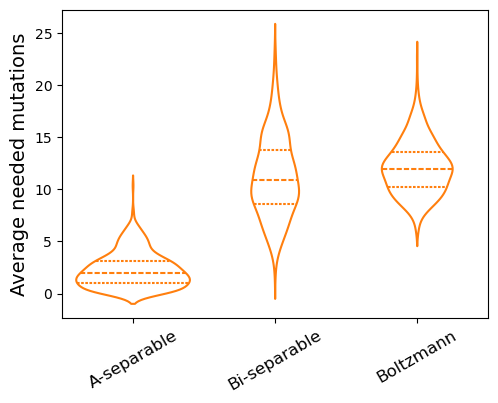

In [166]:
plt.subplots(figsize=(5.5,4))
g=sns.violinplot(data=dfAvgSummary500[dfAvgSummary500['mutation']=='after'], x='method', y='hamming',fill=False, inner="quart", order=order, color=sns.color_palette()[1])
plt.xticks(range(len(xticks)), xticks, rotation=30, fontsize=12)
plt.xlabel('')
plt.ylabel('Average needed mutations', fontsize=14)
plt.savefig('../img/violin_mutation_avg_500.pdf', dpi=200, bbox_inches='tight')

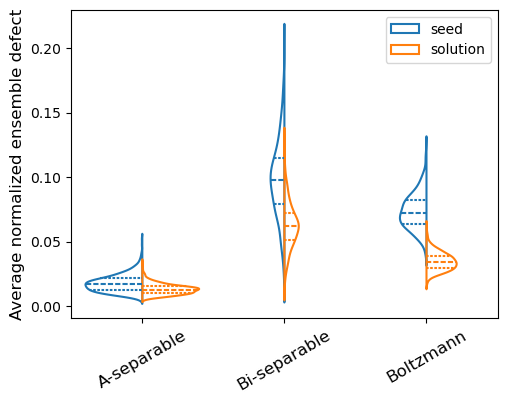

In [167]:
plt.subplots(figsize=(5.5,4))
g=sns.violinplot(data=dfAvgSummary500, x='method', y='ensemble', hue='mutation', split=True, hue_order=['before', 'after'],fill=False, inner="quart", order=order)
t=g.get_legend()
t.set_title("")
new_labels = ['seed', 'solution']
for t, l in zip(t.texts, new_labels):
    t.set_text(l)

plt.xticks(range(len(xticks)), xticks, rotation=30, fontsize=12)
plt.xlabel('')
plt.ylabel('Average normalized ensemble defect', fontsize=12)
plt.savefig('../img/violin_ensemble_avg_500.pdf', dpi=200, bbox_inches='tight')

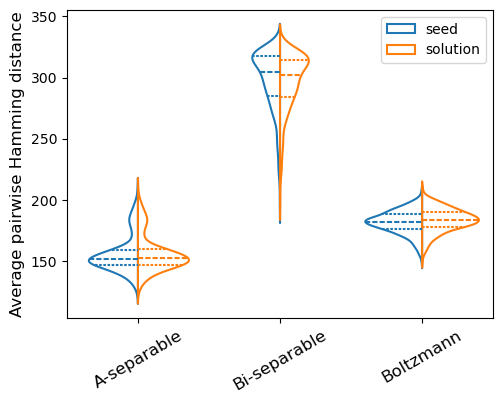

In [168]:
plt.subplots(figsize=(5.5,4))

g=sns.violinplot(data=dfAvgSummary500, x='method', y='avg Hamming', hue='mutation', split=True, hue_order=['before', 'after'], fill=False, inner="quart", order=order)
t=g.get_legend()
t.set_title("")
new_labels = ['seed', 'solution']
for t, l in zip(t.texts, new_labels):
    t.set_text(l)

plt.xticks(range(len(xticks)), xticks, rotation=30, fontsize=12)
plt.xlabel('')
plt.ylabel('Average pairwise Hamming distance', fontsize=12)
plt.savefig('../img/violin_diversity_avg_500.pdf', dpi=200, bbox_inches='tight')

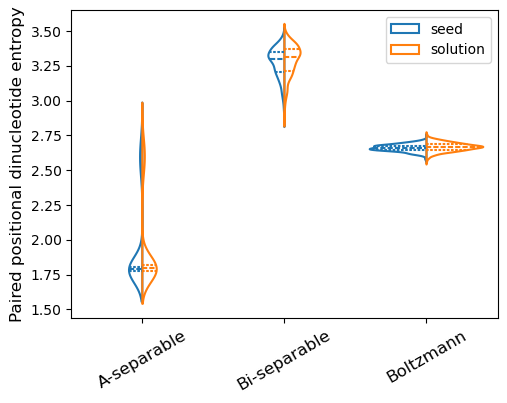

In [169]:
plt.subplots(figsize=(5.5,4))

g=sns.violinplot(data=dfAvgSummary500, x='method', y='Paired Entropy Di', hue='mutation', split=True, hue_order=['before', 'after'], fill=False, inner="quart", order=order)
t=g.get_legend()
t.set_title("")
new_labels = ['seed', 'solution']
for t, l in zip(t.texts, new_labels):
    t.set_text(l)

plt.xticks(range(len(xticks)), xticks, rotation=30, fontsize=12)
plt.xlabel('')
plt.ylabel('Paired positional dinucleotide entropy', fontsize=12)
plt.savefig('../img/violin_paired_500.pdf', dpi=200, bbox_inches='tight')